In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob 
from fastcore.helpers import load_pickle
import dabest
import numpy as np
import matplotlib as mpl
from pycm import ConfusionMatrix
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(['science', 'nature'])

In [2]:
all_files = glob('results/20221204-water-stability_downsampled_5/*.pkl')

In [3]:
all_results = []

weighted_cms = []
unweighted_cms = []
high_confidence_cms = []
for f in all_files:
    r  = load_pickle(f)
    res = {
        'with_confidence': r['with_confidence'],
        'acc': r['cm'].ACC_Macro,
        'seed': f.split('/')[-1].split('_')[0],
        'f1_macro': r['cm'].F1_Macro,
        'f1_micro': r['cm'].F1_Micro,
        'f1_0': r['cm'].F1[0],
        'f1_1': r['cm'].F1[1],
        'cm': r['cm'],
        'confidence_acc': r['confidence_cm'].ACC_Macro if r['confidence_cm'] else None,
        'confidence_f1_macro': r['confidence_cm'].F1_Macro if r['confidence_cm'] else None,
        'confidence_f1_micro': r['confidence_cm'].F1_Micro if r['confidence_cm'] else None,
        'high_confidence_acc': r['high_confidence_cm'].ACC_Macro if r['high_confidence_cm'] else None,
        'high_confidence_f1_macro': r['high_confidence_cm'].F1_Macro if r['high_confidence_cm'] else None,
        'high_confidence_f1_micro': r['high_confidence_cm'].F1_Micro if r['high_confidence_cm'] else None,
        "downsample_fraction": r["downsample_fraction"]
    }
    if r['with_confidence']:
        weighted_cms.append(r['cm'].to_array())
        high_confidence_cms.append(r['high_confidence_cm'])
    else:
        if r['cm'].to_array().shape == (2,2):
            unweighted_cms.append(r['cm'].to_array())
    all_results.append(res)

In [6]:
print(unweighted_cms[1])

[[ 4  4]
 [ 2 28]]


In [7]:
print(weighted_cms[1])

[[ 5  3]
 [ 3 27]]


In [4]:
print(high_confidence_cms[1])

Predict  0        1        
Actual
0        4        1        

1        2        11       





Overall Statistics : 

95% CI                                                            (0.66116,1.0055)
ACC Macro                                                         0.83333
ARI                                                               0.40652
AUNP                                                              0.82308
AUNU                                                              0.82308
Bangdiwala B                                                      0.73656
Bennett S                                                         0.66667
CBA                                                               0.75641
CSI                                                               0.61474
Chi-Squared                                                       6.78462
Chi-Squared DF                                                    1
Conditional Entropy                                            

In [8]:
cm_weighted = ConfusionMatrix(matrix =np.sum(np.array(weighted_cms), axis=0))

/var/folders/m9/_txh68y946s4pxy1x2wnd3lh0000gn/T/ipykernel_98223/3598353317.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cm_weighted = ConfusionMatrix(matrix =np.sum(np.array(weighted_cms), axis=0))


ValueError: operands could not be broadcast together with shapes (3,3) (2,2) 

In [9]:
cm_unweighted = ConfusionMatrix(matrix =np.sum(np.array(unweighted_cms), axis=0))

In [10]:
all_results = pd.DataFrame(all_results)

In [12]:
all_results.groupby(['with_confidence', 'downsample_fraction']).agg(['mean', 'std'])

/var/folders/m9/_txh68y946s4pxy1x2wnd3lh0000gn/T/ipykernel_98223/1657876067.py:1: FutureWarning: ['seed', 'cm'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  all_results.groupby(['with_confidence', 'downsample_fraction']).agg(['mean', 'std'])


acc            f1_macro            \
                                         mean       std      mean       std   
with_confidence downsample_fraction                                           
False           1.0                  0.839181  0.033403  0.752682  0.043586   
True            1.0                  0.828070  0.029631  0.719006  0.076392   

                                     f1_micro                f1_0            \
                                         mean       std      mean       std   
with_confidence downsample_fraction                                           
False           1.0                  0.839181  0.033403  0.606681  0.067063   
True            1.0                  0.825000  0.027368  0.571166  0.080338   

                                         f1_1            ...  \
                                         mean       std  ...   
with_confidence downsample_fraction                      ...   
False           1.0                  0.898683  0.022387  ...   
True            1.0                  0.889995  0.016911  ...   

                                    confidence_f1_macro            \
                                                   mean       std   
with_confidence downsample_fraction                                 
False           1.0                                 NaN       NaN   
True            1.0                            0.552939  0.049158   

                                    confidence_f1_micro            \
                                                   mean       std   
with_confidence downsample_fraction                                 
False           1.0                                 NaN       NaN   
True            1.0                            0.652632  0.048749   

                                    high_confidence_acc            \
                                                   mean       std   
with_confidence downsample_fraction                                 
False           1.0                                 NaN       NaN   
True            1.0                            0.759185  0.063388   

                                    high_confidence_f1_macro            \
                                                        mean       std   
with_confidence downsample_fraction                                      
False           1.0                                      NaN       NaN   
True            1.0                                 0.725531  0.067549   

                                    high_confidence_f1_micro            
                                                        mean       std  
with_confidence downsample_fraction                                     
False           1.0                                      NaN       NaN  
True            1.0                                 0.759185  0.063388  

[2 rows x 22 columns]

In [62]:
all_results[all_results['with_confidence']].agg(['mean', 'std'])

/var/folders/m9/_txh68y946s4pxy1x2wnd3lh0000gn/T/ipykernel_97754/1791100688.py:1: FutureWarning: ['seed', 'cm'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  all_results[all_results['with_confidence']].agg(['mean', 'std'])


,with_confidence,acc,seed,f1_macro,f1_micro,f1_0,f1_1,confidence_acc,confidence_f1_macro,confidence_f1_micro,high_confidence_acc,high_confidence_f1_macro,high_confidence_f1_micro
mean,1.0,0.824561,2.381739e+25,0.687692,0.824561,0.481322,0.894063,0.723197,0.499820,0.584795,0.796395,0.619620,0.796395
std,0.0,0.029422,NaN,0.074020,0.029422,0.134124,0.016829,0.035930,0.093318,0.053896,0.064539,0.146859,0.064539


In [63]:
all_results[~all_results['with_confidence']].agg(['mean', 'std'])

/var/folders/m9/_txh68y946s4pxy1x2wnd3lh0000gn/T/ipykernel_97754/1908984663.py:1: FutureWarning: ['seed', 'cm'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  all_results[~all_results['with_confidence']].agg(['mean', 'std'])


,with_confidence,acc,seed,f1_macro,f1_micro,f1_0,f1_1,confidence_acc,confidence_f1_macro,confidence_f1_micro,high_confidence_acc,high_confidence_f1_macro,high_confidence_f1_micro
mean,0.0,0.815789,1.595172e+25,0.646500,0.807018,0.454452,0.882640,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,0.026316,NaN,0.108975,0.029422,0.109712,0.017047,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
all_results = all_results.sort_values(by='seed')

In [70]:
dabest_results = dabest.load(pd.DataFrame(
    {
        'id': all_results['seed'],
        'with confidence': all_results[all_results['with_confidence']]['f1_macro'],
        'without confidence': all_results[~all_results['with_confidence']]['f1_macro']
    }
), idx=("with confidence", "without confidence",), id_col='id', paired=True)

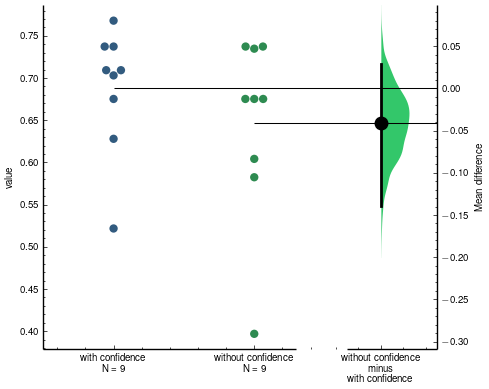

In [66]:
dabest_results.mean_diff.plot()

In [72]:
dabest_results.mean_diff

/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.9/site-packages/scipy/stats/_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.9/site-packages/scipy/stats/_morestats.py:3269: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


DABEST v0.3.1
             
Good afternoon!
The current time is Sun Dec  4 14:39:53 2022.

The paired mean difference between with confidence and without confidence is -0.0412 [95%CI -0.174, 0.02].
The p-value of the two-sided permutation t-test is 0.492. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`